In [5]:
import torch
import pandas as pd
from transformers import BertForSequenceClassification, BertTokenizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

In [6]:
# Load pre-trained BERT model and tokenizer
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [7]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [8]:
# Load a dataset
data = pd.read_csv('combined_dataset.csv')

In [9]:
# Replace NULL Values with space
data.fillna('', inplace=True)

In [10]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

def preprocess_text(text):
    # Convert text to lowercase
    text = str(text).lower()
    # Remove non-alphanumeric characters and extra spaces
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    # Tokenization
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

In [11]:
data['preprocess_text'] = data['text'].apply(preprocess_text)

In [12]:
data.sample(10)

,label,text,preprocess_text
614,REAL,"Kareena Kapoor Khan, who is all set to ring in...",kareena kapoor khan set ring 40birthday tomorr...
1190,REAL,ROME: Novak Djokovic knows it isn't model beha...,rome novak djokovic know isnt model behavior l...
453,REAL,Payal has accused filmmaker Anurag Kashyap of ...,payal accused filmmaker anurag kashyap behavin...
2918,FAKE,A photo of a receipt purported to be from a pe...,photo receipt purported petrol bunk mumbai lin...
2917,REAL,AHMEDABAD: The state forest department has bee...,ahmedabad state forest department removing rad...
730,REAL,A little Rashid magic on @rashidkhan_19's birt...,little rashid magic rashidkhan19s birthday ora...
1779,REAL,ALWAR: Five persons including two minors have ...,alwar five person including two minor sent pol...
2128,REAL,BHOPAL: Madhya Pradesh recorded highest ever 4...,bhopal madhya pradesh recorded highest ever 42...
3562,FAKE,"An image, part of an optical illusion art made...",image part optical illusion art made japanese ...
2384,REAL,SHOPIAN: Hideouts in higher reaches and seekin...,shopian hideout higher reach seeking refuge lo...


In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [14]:
data['text_list'] = data['text'].astype(str)
text = ' '.join(data['text_list'].tolist())

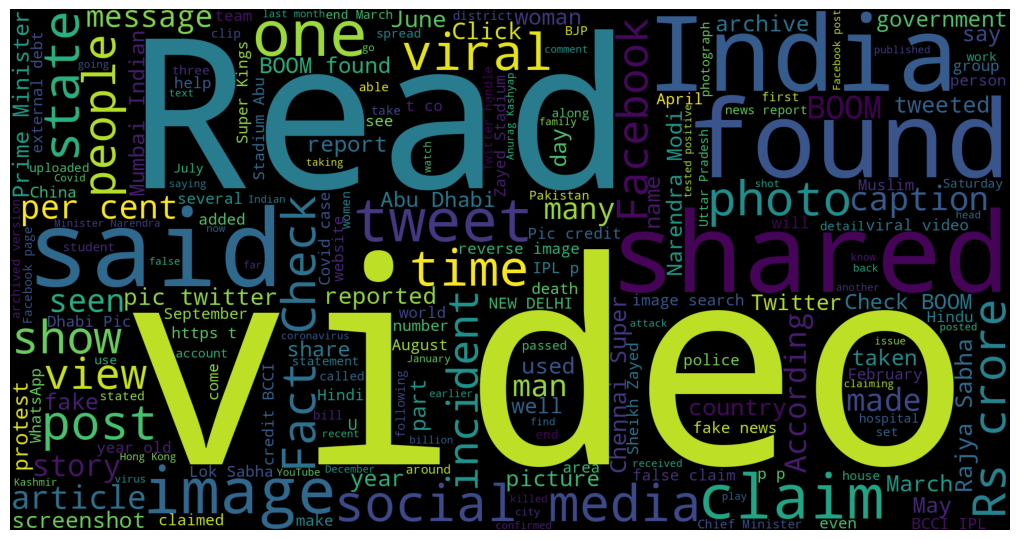

In [15]:
wordcloud = WordCloud(width=1920, height=1000).generate(text)
fig = plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [16]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['preprocess_text'], data['label'], test_size=0.2, random_state=42)

In [17]:
from sklearn.neural_network import MLPClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB

In [18]:
# Define pipelines with TF-IDF vectorizer and Classifier
rfc_pipeline = Pipeline([
    ('vectorizer', CountVectorizer(analyzer=preprocess_text)),
    ('tfidf', TfidfTransformer()),
    ('clf', RandomForestClassifier(random_state=0))
])

mlp_pipeline = Pipeline([
    ('vectorizer', CountVectorizer(analyzer=preprocess_text)),
    ('tfidf', TfidfTransformer()),
    ('classifier', MLPClassifier(solver='adam', activation='tanh',
                                 random_state=1, max_iter=200,
                                 early_stopping=True))
])

lr_pipeline = Pipeline([
    ('vectorizer', CountVectorizer(analyzer=preprocess_text)),
    ('tfidf', TfidfTransformer()),
    ('lr', LogisticRegression())
])

dt_pipeline = Pipeline([
    ('vectorizer', CountVectorizer(analyzer=preprocess_text)),
    ('tfidf', TfidfTransformer()),
    ('dt', DecisionTreeClassifier())
])

gbc_pipeline = Pipeline([
    ('vectorizer', CountVectorizer(analyzer=preprocess_text)),
    ('tfidf', TfidfTransformer()),
    ('gbc', GradientBoostingClassifier(random_state=0))
])

mnb_pipeline = Pipeline([
    ('vectorizer', CountVectorizer(analyzer=preprocess_text)),
    ('tfidf', TfidfTransformer()),
    ('mnb', MultinomialNB())
])

In [19]:
# Train the pipelines
rfc_pipeline.fit(X_train, y_train)
print('RFC Pipeline Fit Completed')
mlp_pipeline.fit(X_train, y_train)
print('MLP Pipeline Fit Completed')
lr_pipeline.fit(X_train, y_train)
print('LR Pipeline Fit Completed')
dt_pipeline.fit(X_train, y_train)
print('DT Pipeline Fit Completed')
gbc_pipeline.fit(X_train, y_train)
print('GBC Pipeline Fit Completed')
mnb_pipeline.fit(X_train, y_train)
print('MNB Pipeline Fit Completed')

RFC Pipeline Fit Completed
MLP Pipeline Fit Completed
LR Pipeline Fit Completed
DT Pipeline Fit Completed
GBC Pipeline Fit Completed
MNB Pipeline Fit Completed


In [20]:
# Evaluate the pipelines
from sklearn.metrics import classification_report

y_pred1 = rfc_pipeline.predict(X_test)
accuracy1 = accuracy_score(y_test, y_pred1)
print("RFC Accuracy:", accuracy1)
print(classification_report(y_test, y_pred1))

y_pred2 = mlp_pipeline.predict(X_test)
accuracy2 = accuracy_score(y_test, y_pred2)
print("MLP Accuracy:", accuracy2)
print(classification_report(y_test, y_pred2))

y_pred3 = lr_pipeline.predict(X_test)
accuracy3 = accuracy_score(y_test, y_pred3)
print("LR Accuracy:", accuracy3)
print(classification_report(y_test, y_pred3))

y_pred4 = dt_pipeline.predict(X_test)
accuracy4 = accuracy_score(y_test, y_pred4)
print("DT Accuracy:", accuracy4)
print(classification_report(y_test, y_pred4))

y_pred5 = gbc_pipeline.predict(X_test)
accuracy5 = accuracy_score(y_test, y_pred5)
print("GBC Accuracy:", accuracy5)
print(classification_report(y_test, y_pred5))

y_pred5 = mnb_pipeline.predict(X_test)
accuracy5 = accuracy_score(y_test, y_pred5)
print("MNB Accuracy:", accuracy5)
print(classification_report(y_test, y_pred5))

RFC Accuracy: 0.9182305630026809
              precision    recall  f1-score   support

        FAKE       0.87      0.99      0.92       373
        REAL       0.98      0.85      0.91       373

    accuracy                           0.92       746
   macro avg       0.93      0.92      0.92       746
weighted avg       0.93      0.92      0.92       746

MLP Accuracy: 0.8512064343163539
              precision    recall  f1-score   support

        FAKE       0.87      0.83      0.85       373
        REAL       0.84      0.87      0.85       373

    accuracy                           0.85       746
   macro avg       0.85      0.85      0.85       746
weighted avg       0.85      0.85      0.85       746

LR Accuracy: 0.7855227882037533
              precision    recall  f1-score   support

        FAKE       0.78      0.80      0.79       373
        REAL       0.79      0.77      0.78       373

    accuracy                           0.79       746
   macro avg       0.79      0

In [21]:
import torch

def predict_news_authenticity(news_text, tokenizer, model):
    # Tokenize the news article
    inputs = tokenizer(news_text, return_tensors='pt', max_length=512, truncation=True)
    # Perform inference
    with torch.no_grad():
        outputs = model(**inputs)
    # Get the predicted label
    predicted_label = torch.argmax(outputs.logits).item()
    # Convert label to authenticity (0 for real, 1 for fake)
    authenticity = "Fake" if predicted_label == 1 else "Real"
    return authenticity

In [22]:
# Example usage

news_text = '''BCA'''

authenticity = predict_news_authenticity(news_text, tokenizer, model)
print("BERT Prediction:", authenticity)

# Predict using RFC
rfc_prediction = rfc_pipeline.predict([news_text])
print("RFC Prediction:", rfc_prediction)

# Predict using MLP
mlp_prediction = mlp_pipeline.predict([news_text])
print("MLP Prediction:", mlp_prediction)

# Predict using LR
lr_prediction = lr_pipeline.predict([news_text])
print("LR Prediction:", lr_prediction)

# Predict using dt
dt_prediction = dt_pipeline.predict([news_text])
print("DT Prediction:", dt_prediction)

# Predict using gbc
gbc_prediction = gbc_pipeline.predict([news_text])
print("GBC Prediction:", gbc_prediction)

# Predict using mnb
mnb_prediction = mnb_pipeline.predict([news_text])
print("MNB Prediction:", mnb_prediction)

BERT Prediction: Real
RFC Prediction: ['FAKE']
MLP Prediction: ['FAKE']
LR Prediction: ['FAKE']
DT Prediction: ['REAL']
GBC Prediction: ['FAKE']
MNB Prediction: ['FAKE']


In [23]:
import joblib

In [24]:
joblib.dump(rfc_pipeline, 'RFC_Model.pkl')
joblib.dump(mlp_pipeline, 'MLP_Model.pkl')
joblib.dump(lr_pipeline, 'LR_Model.pkl')
joblib.dump(dt_pipeline, 'DT_Model.pkl')
joblib.dump(gbc_pipeline, 'GBC_Model.pkl')
joblib.dump(mnb_pipeline, 'MNB_Model.pkl')

['MNB_Model.pkl']